# Chapter 2: Markov Chain, a Peek Into the Future

### Import libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['text.usetex'] = True

### Weather Markov chain

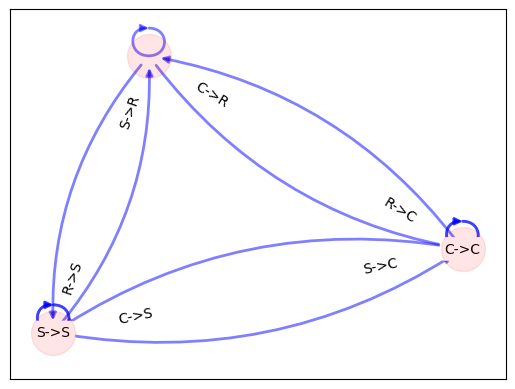

In [2]:
G = nx.MultiDiGraph()

normal_edges = [("Rainy", "Sunny"), ("Rainy", "Cloudy"), 
                ("Cloudy", "Sunny"), ("Cloudy", "Rainy"), 
                ("Cloudy", "Cloudy"), ("Sunny", "Sunny"), 
                ("Sunny", "Rainy"), ("Sunny", "Cloudy")]

self_loop_edges = [ ("Rainy", "Rainy"),
                   ("Cloudy", "Cloudy"),
                   ("Sunny", "Sunny")]

G.add_edges_from(normal_edges)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, 
                       pos, 
                       node_color = 'r', 
                       node_size = 1000, alpha = 0.1)

nx.draw_networkx_edges(G, 
                       pos,
                       connectionstyle='arc3, rad = 0.2', 
                       edgelist = normal_edges, 
                       width = 2, 
                       alpha = 0.5, 
                       edge_color='b')

nx.draw_networkx_edges(G, 
                       pos,
                       connectionstyle='arc3, rad = 0.1', 
                       edgelist = self_loop_edges, 
                       width = 2, 
                       alpha = 0.5, 
                       edge_color='b')


normal_edge_labels = {(n1, n2): f'{n1[:1]}->{n2[:1]}'for (n1, n2) in normal_edges}

nx.draw_networkx_edge_labels(G, 
                             pos, 
                             edge_labels=normal_edge_labels,
                            label_pos = 0.2,
                            horizontalalignment = 'center')

plt.show()

### Run a simulation with an initial condition

In [3]:
sunny_to = {"sunny":1/2, "cloudy":1/3,"rainy":1/6}
cloudy_to = {"sunny":1/3, "cloudy":1/3,"rainy":1/3}
rainy_to = {"sunny":2/3, "cloudy":1/6,"rainy":1/6}

state = {"sunny":1, "cloudy":0,"rainy":0}
weathers = ["sunny","cloudy","rainy"]
for _ in range(10):
    next_state = {} 
    for weather in weathers:
        next_state[weather] = (sunny_to[weather] * state["sunny"] + 
                               cloudy_to[weather] * state["cloudy"] + 
                               rainy_to[weather] * state["rainy"])
    state = next_state
    print(state)

{'sunny': 0.5, 'cloudy': 0.3333333333333333, 'rainy': 0.16666666666666666}
{'sunny': 0.4722222222222222, 'cloudy': 0.3055555555555556, 'rainy': 0.2222222222222222}
{'sunny': 0.4861111111111111, 'cloudy': 0.2962962962962963, 'rainy': 0.2175925925925926}
{'sunny': 0.4868827160493827, 'cloudy': 0.2970679012345679, 'rainy': 0.21604938271604937}
{'sunny': 0.48649691358024694, 'cloudy': 0.2973251028806584, 'rainy': 0.21617798353909465}
{'sunny': 0.48647548010973934, 'cloudy': 0.29730366941015085, 'rainy': 0.21622085048010972}
{'sunny': 0.4864861968449931, 'cloudy': 0.29729652491998165, 'rainy': 0.21621727823502512}
{'sunny': 0.4864867922191738, 'cloudy': 0.29729712029416244, 'rainy': 0.21621608748666357}
{'sunny': 0.4864864945320834, 'cloudy': 0.29729731875222265, 'rainy': 0.2162161867156937}
{'sunny': 0.48648647799391176, 'cloudy': 0.29729730221405093, 'rainy': 0.21621621979203703}


#### Run simulation as a matrix multiplication

In [4]:
tm = np.array([[1/2,1/3,2/3],
               [1/3,1/3,1/6],
               [1/6,1/3,1/6]])
state = np.array([1,0,0])
for _ in range(10):
    state = tm@state
    print(state)

[0.5        0.33333333 0.16666667]
[0.47222222 0.30555556 0.22222222]
[0.48611111 0.2962963  0.21759259]
[0.48688272 0.2970679  0.21604938]
[0.48649691 0.2973251  0.21617798]
[0.48647548 0.29730367 0.21622085]
[0.4864862  0.29729652 0.21621728]
[0.48648679 0.29729712 0.21621609]
[0.48648649 0.29729732 0.21621619]
[0.48648648 0.2972973  0.21621622]


#### Check Eigenstate of the transition matrix

In [5]:
np.linalg.eig(tm)[0]
np.linalg.eig(tm)[1]

array([[ 0.79783597+0.j        ,  0.70710678+0.j        ,
         0.70710678-0.j        ],
       [ 0.48756643+0.j        , -0.35355339-0.35355339j,
        -0.35355339+0.35355339j],
       [ 0.35459377+0.j        , -0.35355339+0.35355339j,
        -0.35355339-0.35355339j]])

#### Use lambda syntax to perform matrix multiplication
Also import the `array_to_latex` library

In [6]:
from functools import reduce
import array_to_latex as a2l
reduce(lambda x,y:x@y, [tm for _ in range(10)])
a2l.to_ltx(reduce(lambda x,y:x@y, [tm for _ in range(10)]))

\begin{bmatrix}
  0.49 &  0.49 &  0.49\\
  0.30 &  0.30 &  0.30\\
  0.22 &  0.22 &  0.22
\end{bmatrix}


\begin{bmatrix}
  0.03 &  0.23 &  0.77\\
  0.78 &  0.03 &  0.21\\
  0.20 &  0.75 &  0.02
\end{bmatrix}

### Visualizing probabilities against simulation rounds

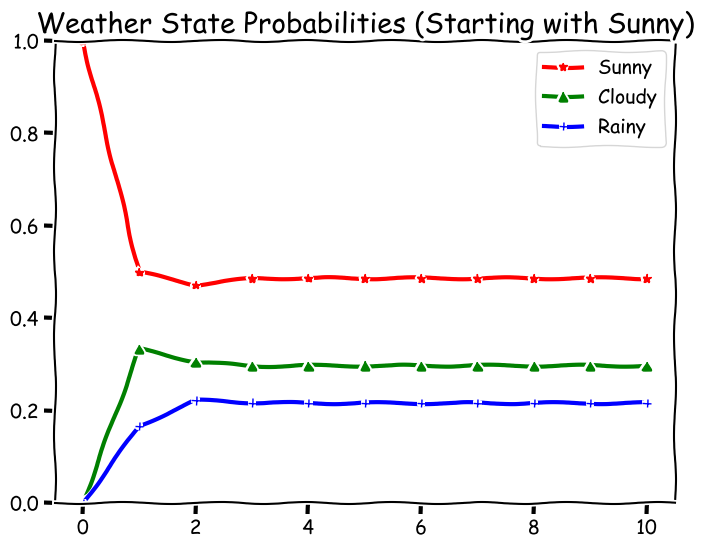

In [7]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,6)) 
    sunny, cloudy, rainy = [],[],[]
    tm = np.array([[1/2,1/3,2/3],
                   [1/3,1/3,1/6],
                   [1/6,1/3,1/6]])
    state = np.array([1,0,0])
    sunny.append(state[0])
    cloudy.append(state[1])
    rainy.append(state[2])
    for _ in range(10):
        state = tm@state
        sunny.append(state[0])
        cloudy.append(state[1])
        rainy.append(state[2])
    # add line 
    plt.plot(sunny,lw=3,color="r",label="Sunny",marker="*")
    plt.plot(cloudy,lw=3,color="g",label="Cloudy",marker="^")
    plt.plot(rainy,lw=3,color="b",label="Rainy",marker="+")
    ax.set_title("Weather State Probabilities (Starting with Sunny)",fontsize=20)
    ax.set_ylim((0,1))
    plt.legend()
    fig.savefig("img1.jpg")

### Visualizing probabilities against simulation rounds (another initial condition)

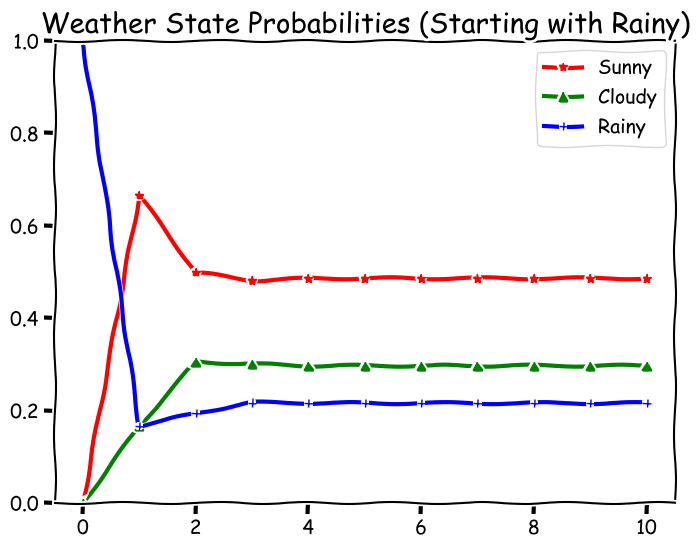

In [8]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,6)) 
    sunny, cloudy, rainy = [],[],[]
    tm = np.array([[1/2,1/3,2/3],
                   [1/3,1/3,1/6],
                   [1/6,1/3,1/6]])
    state = np.array([0,0,1])
    sunny.append(state[0])
    cloudy.append(state[1])
    rainy.append(state[2])
    for _ in range(10):
        state = tm@state
        sunny.append(state[0])
        cloudy.append(state[1])
        rainy.append(state[2])
    # add line 
    plt.plot(sunny,lw=3,color="r",label="Sunny",marker="*")
    plt.plot(cloudy,lw=3,color="g",label="Cloudy",marker="^")
    plt.plot(rainy,lw=3,color="b",label="Rainy",marker="+")
    ax.set_title("Weather State Probabilities (Starting with Rainy)",fontsize=20)
    ax.set_ylim((0,1))
    plt.legend()
    fig.savefig("img2.jpg")

### Oscillating states example

In [9]:
tm = np.array([[0, 0, 1],
               [1, 0, 0],
               [0, 1, 0]])
state = np.array([1,0,0])
for _ in range(10):
    state = tm@state
    print(state)

[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]


In [10]:
tm = np.array([[0,    0.05, 0.98],
               [0.99,  0, 0.02],
               [0.01, 0.95,  0]])
a2l.to_ltx(tm)

\begin{bmatrix}
  0.00 &  0.05 &  0.98\\
  0.99 &  0.00 &  0.02\\
  0.01 &  0.95 &  0.00
\end{bmatrix}


\begin{bmatrix}
  0.00 &  0.05 &  0.98\\
  0.99 &  0.00 &  0.02\\
  0.01 &  0.95 &  0.00
\end{bmatrix}

### Tortoise example
You may need to run `brew install graphviz` or `sudo apt-get install graphviz` depending on your operating system.
A new window will pop up.

In [11]:
# tortoise 
from graphviz import Graph

G = Graph('G',format='png')
font_size = "18"

G.attr('graph', pad='1', ranksep='1', nodesep='1', rankdir="LR")
G.attr('node', shape='box', margin="0.5")
# G.graph_attr['rankdir'] = 'LR'


G.node('Banana', 'Banana(0)',fontsize=font_size)
G.node('1', '1',fontsize=font_size)
G.node('2', '2',fontsize=font_size)
G.node('Tortoise', 'Tortoise(3)',fontsize=font_size)
G.node('4', '4',fontsize=font_size)
G.node('5', '5',fontsize=font_size)
G.node('6', '6',fontsize=font_size)
G.node('Apple', 'Apple(7)',fontsize=font_size)

direction = "both"

G.edge('Banana', '1',dir=direction)
G.edge('1', '2',dir=direction)
G.edge('2', 'Tortoise',dir=direction)
G.edge('Tortoise', '4',dir=direction)
G.edge('4', '5',dir=direction)
G.edge('5', '6',dir=direction)
G.edge('6', 'Apple',dir=direction)


G.view("tortoise")

'tortoise.png'

### Write a function to perform the tortoise run.

In [13]:
# tortoise simulation
def tortoise_run(state = 3, left_prob = 0.5):
    steps = 0
    while state % 7 != 0:
        if np.random.random() < left_prob:
            state -= 1
        else:
            state += 1
        steps += 1
    if state == 0:
        return steps, 0
    else:
        return steps, 7

tortoise_run()   

(12, 7)

### Probabilities of reaching bananas or apples as simulations accumulate

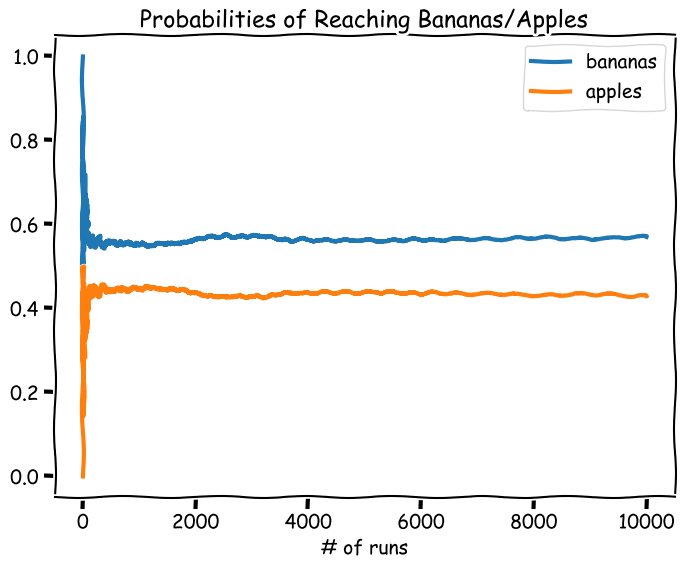

In [14]:
simulations = [tortoise_run()  for _ in range(10000)]

bananas = np.array([x[1] == 0 for x in simulations]).cumsum()
apples = np.array([x[1] == 7 for x in simulations]).cumsum()

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,6)) 
    plt.plot(bananas/(bananas+apples), lw=3,label="bananas")
    plt.plot(apples/(bananas+apples), lw=3,label="apples")
    plt.legend()
    plt.title("Probabilities of Reaching Bananas/Apples")
    plt.xlabel("# of runs")
    fig.savefig("img3.jpg")

### Number of steps before the tortoise stops moving

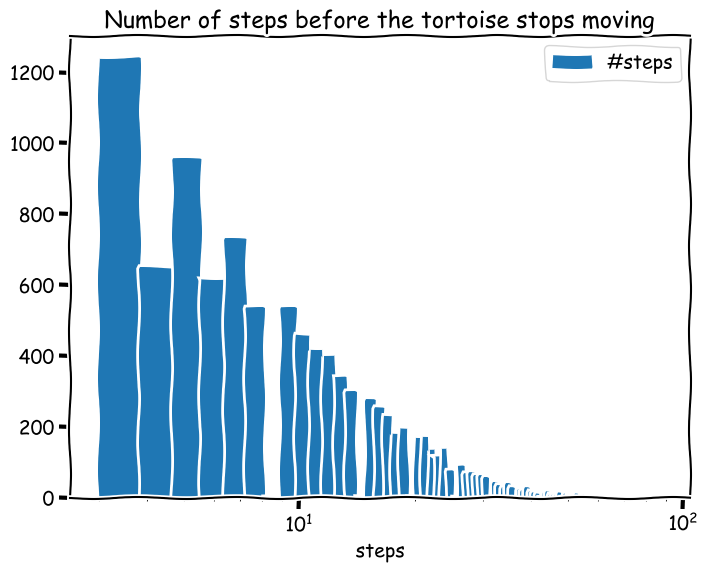

In [15]:
steps = np.array([x[0] for x in simulations])
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,6)) 
    plt.xscale("log")
    plt.hist(steps, label = "#steps",bins=100)
    plt.legend()
    plt.title("Number of steps before the tortoise stops moving")
    plt.xlabel("steps")
    fig.savefig("img4.jpg")

### Tortoise question as a transitional matrix question

In [21]:
# tortoise question as a transitional matrix question
tortoise_tm = np.array([[1,0.5,0,0,0,0,0,0],
                        [0,0,0.5,0,0,0,0,0],
                        [0,0.5,0,0.5,0,0,0,0],
                        [0,0,0.5,0,0.5,0,0,0],
                        [0,0,0,0.5,0,0.5,0,0],
                        [0,0,0,0,0.5,0,0.5,0],
                        [0,0,0,0,0.,0.5,0,0],
                        [0,0,0,0,0,0,0.5,1],])

In [17]:
tortoise_tm

array([[1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ]])

In [18]:
np.linalg.eig(tortoise_tm)

(array([ 1.        ,  1.        , -0.90096887, -0.6234898 ,  0.90096887,
         0.6234898 , -0.22252093,  0.22252093]),
 array([[ 1.        ,  0.        ,  0.06077491, -0.12662573,  0.60530168,
          0.43656895, -0.20406535, -0.30284274],
        [ 0.        ,  0.        , -0.23106241,  0.41115116, -0.11988742,
         -0.32874532,  0.49894833,  0.47090778],
        [ 0.        ,  0.        ,  0.41636007, -0.51269711, -0.21602967,
         -0.40993871, -0.2220529 ,  0.20957368],
        [ 0.        ,  0.        , -0.51919251,  0.22817168, -0.26938459,
         -0.18243989, -0.40012549, -0.37763872],
        [ 0.        ,  0.        ,  0.51919251,  0.22817168, -0.26938459,
          0.18243989,  0.40012549, -0.37763872],
        [ 0.        ,  0.        , -0.41636007, -0.51269711, -0.21602967,
          0.40993871,  0.2220529 ,  0.20957368],
        [ 0.        ,  0.        ,  0.23106241,  0.41115116, -0.11988742,
          0.32874532, -0.49894833,  0.47090778],
        [ 0.     

In [19]:
a2l.to_ltx(reduce(lambda x,y:x@y,[tortoise_tm for _ in range(50)]))

\begin{bmatrix}
  1.00 &  0.86 &  0.71 &  0.57 &  0.43 &  0.28 &  0.14 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.14 &  0.28 &  0.43 &  0.57 &  0.71 &  0.86 &  1.00
\end{bmatrix}


\begin{bmatrix}
  1.00 &  0.86 &  0.71 &  0.57 &  0.43 &  0.28 &  0.14 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.14 &  0.28 &  0.43 &  0.57 &  0.71 &  0.86 &  1.00
\end{bmatrix}

### Import libraries and download resources for the sonnet problem

In [22]:
# sonnet preprocessing
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet') # comment this line if you already downloaded it
lemmatizer = WordNetLemmatizer()

sonnet_path = "../../code_examples/chap2/sonnet.txt"
with open(sonnet_path,"r") as fp:
    sonnets = fp.readlines()

sonnets = [sentence.strip().lower().replace("'s","") for sentence in sonnets if sentence != "\n" ]
sonnets = ["".join([char for char in sentence if char not in string.punctuation]) for sentence in sonnets]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rongpengli/nltk_data...


### Build the word-to-word transition dictionary

In [23]:
from collections import defaultdict
transition_dict = defaultdict(lambda : defaultdict(int))

for sentence in sonnets:
    words = list(filter(lambda x: len(x.strip()) > 0, sentence.split(" ")))
    words_pairs = [(lemmatizer.lemmatize(words[i]),lemmatizer.lemmatize(words[i+1])) for i in range(len(words)-1)]
    for (word_from, word_to) in words_pairs:
        transition_dict[word_from][word_to] += 1

In [24]:
transition_dict

defaultdict(<function __main__.<lambda>()>,
            {'from': defaultdict(int,
                         {'fairest': 1,
                          'highmost': 1,
                          'the': 8,
                          'his': 2,
                          'that': 1,
                          'youth': 1,
                          'heat': 1,
                          'thine': 1,
                          'thyself': 1,
                          'you': 3,
                          'fair': 1,
                          'faring': 1,
                          'thee': 10,
                          'sullen': 1,
                          'woe': 1,
                          'mine': 1,
                          'me': 5,
                          'love': 2,
                          'thy': 6,
                          'limit': 1,
                          'hand': 1,
                          'whence': 1,
                          'where': 1,
                          'home': 1,
                

### Visualizing the word transition graph
A new image will pop up

In [25]:
# sonnet 
from graphviz import Digraph

count_threshold = 10

G = Digraph('G',format='png',engine='neato')
font_size = "300"

G.attr('graph', pad='1', ranksep='1', nodesep='1')
G.attr('node', shape='circle', fixedsize='true')
G.attr(overlap="false")

for word_from in transition_dict.keys():
    for word_to in transition_dict[word_from].keys():
        lw = transition_dict[word_from][word_to]
        if lw > count_threshold:
            G.edge(word_from, word_to,penwidth=str(lw*0.1),label=str(lw))

G.view("sonnet")

'sonnet.png'

### Write helper functions to generate sonnets
And run it!

In [26]:
def sample_according_to_value(to_dict:dict):
    # return a key that corresponds to the value as frequency
    keys, freqs = [],[]
    for key,val in to_dict.items():
        keys.append(key)
        freqs.append(val)
    freqs = np.array(freqs)
    freqs = freqs/sum(freqs)
    return np.random.choice(keys,p=freqs)


def generate_sentence(start_word = "i", transition_dict = transition_dict, hard_limit = 14):
    word = start_word
    sentence = []
    while word in transition_dict and len(sentence) < hard_limit:
        sentence.append(word)
        word = sample_according_to_value(transition_dict[word])
    sentence.append(word)
    return " ".join(sentence)

for i in range(14):
    start_word = np.random.choice(list(transition_dict.keys()))
    print(generate_sentence(start_word))

though my deepest sense how have remembered such matter then can i view thing turn
vow are but a dream doth smother
creature broke and made of my flame with shower are free
credit her lip that i ensconce me not le the willing patient i witness call
philomel in thing she walk with thy precious minute hasten to stand least kindhearted prove
traffic with intelligence
enlighten thee more than thou to praise to follow that it do write good word
ceremony of goodness would show her maiden virtue of space i in praise cannot be
firstborn flower add something sweet self bring water yet be a father take thou none
distraction of single wilt thou perceivt which heavily he learned wing
boundless sea all thy love doth belong
often is done their show not i scorn to fear is dressing of your praise
drink up in secret influence comment of mine own desert a time at grievance foregone
private widow well denote
